# Исследование успешности компьютерных игр

## ОГЛАВЛЕНИЕ

[Описание проекта](#description)

[Цель проекта](#purpose)

[1. Изучение общей информации](#1)

- [1.1 Вывод по анализу общей информации](#1.1)

[2. Предобработка данных](#2)

- [2.1 Замена названий столбцов](#2.1)

- [2.2 Обработка пропусков](#2.2)
    
- [2.3 Преобразование типов данных](#2.3)

- [2.4 Добавление суммарных продаж по регионам](#2.4)

[3. Анализ данных](#3)

- [3.1 Исследование количества игр по периодам](#3.1)

- [3.2 Исследование изменения продаж по платформам по годам](#3.2)

- [3.3 Отбор данных за актуальный период](#3.3)

- [3.4 Отбор потенциально прибыльных платформ](#3.4)

- [3.5 Распределение данных о глобальных продажах игр в разбивке по платформам](#3.5)

- [3.6 Оценка влияния отзывов на продажи](#3.6)

- [3.7 Анализ прибыльности игр по жанрам](#3.7)

- [3.8 Вывод по анализу данных](#3.8)

[4. Портрет пользователя по регионам](#4)

- [4.1 Топ-5 популярных платформ](#4.1)

- [4.2 Топ-5 популярных жанров](#4.2)

- [4.3 Влияние рейтинга ESRB на продажи](#4.3)

- [4.3 Вывод по анализу пользователей по регионам](#4.4)

[5. Проверка гипотез](#5)

- [5.1 Средние рейтинги платформ Xbox One и PC одинаковые](#5.1)

- [5.2 Средние рейтинги жанров Action и Sports разные](#5.2)

[Общий вывод](#6)

<a id='description'></a>
## Описание проекта

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.  

В проекте будем иметь с данными до 2016 года и планировать кампанию на 2017-й. Нужно отработать принцип работы с данными, который можно будет применить в любом другом году.

**Описание данных:**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Есть информация о том, что данные за 2016 год могут быть неполными.  

ESRB (Entertainment Software Rating Board) — ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

<a id='purpose'></a>
## Цель проекта

В рамках данного проекта необходимо определить и проанализировать наиболее успешные игры. Это позволит выделить факторы, определяющие коммерческий успех игры, и с учетом этой информации компания сможет спланировать рекламный бюджет на будущий год. Для этого будем исследовать данные о продажах игр в разрезе платформ, жанров, регионов и оценок пользователей.

Также предстоит проверить две гипотезы:
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковы.
2. Средние пользовательские рейтинги жанров Action и Sports разные.

<a id='1'></a>
## Изучение общей информации

In [1]:
#Импортируем нужные библиотеки
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from scipy.stats import levene


#Включаем полное отображение всех колонок таблиц
pd.set_option('display.max_columns', None)

In [2]:
#Прочитаем датасет
games = pd.read_csv('/datasets/games.csv')

In [3]:
#Выведем первые 10 строк таблицы для знакомства с данными
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#Выведем общую информацию для оценки количества пропусков и типов данных
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
#Посчитаем процент пропусков по столбцам
report = games.isna().sum().to_frame()
report = report.rename(columns = {0: 'missing_values'})
report['% of total'] = (report['missing_values'] / games.shape[0]).round(2)
report.sort_values(by = 'missing_values', ascending = False)

,missing_values,% of total
Critic_Score,8578,0.51
Rating,6766,0.40
User_Score,6701,0.40
Year_of_Release,269,0.02
Name,2,0.00
Genre,2,0.00
Platform,0,0.00
NA_sales,0,0.00
EU_sales,0,0.00
JP_sales,0,0.00


<a id='1.1'></a>
### Вывод по анализу общей информации

1. Датасет состоит из 11 столбцов и 16715 строк. Не очень удобны названия колонок с заглавных букв, планируем привести к нижнему регистру.
2. Очень большое количество пропусков в столбцах Critic_Score, Rating и User_Score (51% и по 40% соответственно). Скорее всего, их ничем нельзя заполнить, тем более, что для такого большого количества это приведет к сильному искажению данных.
3. Обнаружено 2% пропусков в столбце Year_of_Release. Здесь можно рассмотреть возможность замены. Например, исследовать соответствие пропусков дублям из колонки Name, в случае совпадения можно заполнить теми же значениями: так как дубли в названиях означают, что игра выпущена для разных платформ, и это довольно часто происходит в тот же год или "соседние". И поскольку наша цель в проекте оценивать период, а не конкретные годы, с такой заменой не должно получиться большой погрешности.
4. Есть пара пропусков в столбцах Name и Genre. Эти данные критичны для нашего исследования, поэтому такие строчки можно просто удалить.
5. В некоторых столбцах обнаружены некорректные типы данных, необходимо из заменить. В Year_of_Release тип float меняем на int, User_score меняем с object на int, в Critic_Score можно привести к int (т.к. значения - только целые числа)

<a id='2'></a>
## Предобработка данных

<a id='2.1'></a>
### Замена названий столбцов

In [7]:
#Приведем названия столбцов к нижнему регистру, год сократим
games.set_axis(['name','platform','year', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'], axis = 'columns', inplace = True) 

<a id='2.2'></a>
### Обработка пропусков

У нас есть большое количество пропусков в колонках с оценкой критиков (51% пропусков), оценкой пользователей (40%) и возрастным рейтингом (40%). Причины таких пропусков могут самыми разными: совсем новая игра (не успело собраться достаточное количество отзывов для расчета или еще нет отзывов); старая игра, по которой в принципе еще не собирались отзывы в системе; непопулярная игра, по которой не собрано достаточное для формирования рейтинга количество отзывов (например, в некоторых строчках видно, что у игр с пустыми рейтингами и продажи по нулям); различные технические причины, проблемы выгрузки данных.   

Что касается возрастного рейтинга, то, помимо технических причин, возможно, что какие-то игры не имеют такого рейтинга совсем или имеют такой, который нельзя точно соотнести с используемой системой (например, для старых игр или выпущенных в каких-то отдельных регионах со своими рейтинговыми ситсемами). Однако этот столбец понадобится нам для оценки долей, поэтому заполним его текстовым значением, чтобы можно было отобразить на графике.

Прямая зависимость между ними и другими данными нашего датасета не очевидна, заменять не на что. Кроме того, любая замена такого процента данных в датасете неизбежно приведет к их искажению, в нашем случае это очень плохо, т.к. данные из этих столбцов потребуются для анализа.   
Замена на ноль здесь тоже неактуальна, поскольку подразумевала бы нулевой рейтинг, что в принципе невозможно. 

В столбце с оценками пользователей можно увидеть текстовое значение tbd. Насколько удалось выяснить, на площадках типа Steam это означает, что значение будет определено позже (вероятно, пока собралось недостаточно данных, чтобы алгоритм сайта посчитал и выдал оценку). Такие строки можно заменить на nan, чтобы они в дальнейшем не мешали нашим расчетам.  

В столбце с годами релиза пропуски могли бы появиться, например, в том случае, если на той или иной платформе игра так и не была выпущена. Однако изучение данных показывает, что это видимо не так - в строчках с пустыми годами есть данные по продажам, оценки. Там также совершенно разнообразные платформы. Так что, вероятно, пропуски здесь появились случайно. Их не так много (2%), и мы можем попробовать заполнить теми же данными, которые соответствуют аналогичной игре на других платформах (часто это тот же год для всех платформ), для случаев, когда годов несколько - возьмем максимальный из группы с одним названием. Значения, которые не удастся заполнить (нет игры на других платформах или нет данных по всем платформам), оставим с пропусками.

In [8]:
#Заменим пропуски в годах на максимальное значение среди одинаковых игр на разных платформах
games['year'] = games['year'].fillna(0)
games.loc[games['year'] == 0, 'year'] = games.groupby('name')['year'].transform('max')
games.loc[games['year'] == 0, 'year'] = 'NaN'

In [10]:
#Заменим tbd на nan в колонке user_score
games['user_score'] = games['user_score'].replace('tbd', 'NaN')

In [11]:
#Удалим строки с пропусками в name и genre
games.dropna(subset = ['name', 'genre'], inplace = True)

In [12]:
#Заменим пропуски в столбце rating
games['rating'] = games['rating'].fillna('unknown')

In [13]:
#Проверим, что стало с типами
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name            16713 non-null object
platform        16713 non-null object
year            16713 non-null object
genre           16713 non-null object
na_sales        16713 non-null float64
eu_sales        16713 non-null float64
jp_sales        16713 non-null float64
other_sales     16713 non-null float64
critic_score    8137 non-null float64
user_score      10014 non-null object
rating          16713 non-null object
dtypes: float64(5), object(6)
memory usage: 1.5+ MB


In [14]:
#Проверим наличие грубых дубликатов
games.duplicated().sum()

0

<a id='2.3'></a>
### Преобразование типов данных

In [15]:
#Преобразуем годы и оценку критиков в целочисленный тип
games['year'] = pd.to_numeric(games['year'], errors='coerce')
games['year'] = games['year'].astype('Int64')
games['critic_score'] = games['critic_score'].astype('Int64')
#Преобразуем оценку пользователей в тип float (эти оценки не являются целыми числами)
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name            16713 non-null object
platform        16713 non-null object
year            16567 non-null Int64
genre           16713 non-null object
na_sales        16713 non-null float64
eu_sales        16713 non-null float64
jp_sales        16713 non-null float64
other_sales     16713 non-null float64
critic_score    8137 non-null Int64
user_score      7590 non-null float64
rating          16713 non-null object
dtypes: Int64(2), float64(5), object(4)
memory usage: 1.6+ MB


<a id='2.4'></a>
### Добавление суммарных продаж по регионам

In [16]:
#Посчитаем сумму продаж игры по всем регионам и добавим в новый столбец
games['all_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']

games.head()


,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


<a id='3'></a>
## Анализ данных

<a id='3.1'></a>
### Исследование количества игр по периодам

In [17]:
#Посмотрим, сколько игр было выпущено ежегодно за рассматриваемый промежуток времени
display(games['year'].value_counts().head(40))

2008    1440
2009    1431
2010    1271
2007    1202
2011    1153
2006    1020
2005     947
2002     845
2003     785
2004     765
2012     662
2015     606
2014     582
2013     547
2016     502
2001     484
1998     379
2000     350
1999     339
1997     289
1996     263
1995     219
1994     121
1993      60
1981      46
1992      43
1991      41
1982      36
1986      21
1983      17
1989      17
1987      16
1990      16
1988      15
1984      14
1985      14
1980       9
Name: year, dtype: int64

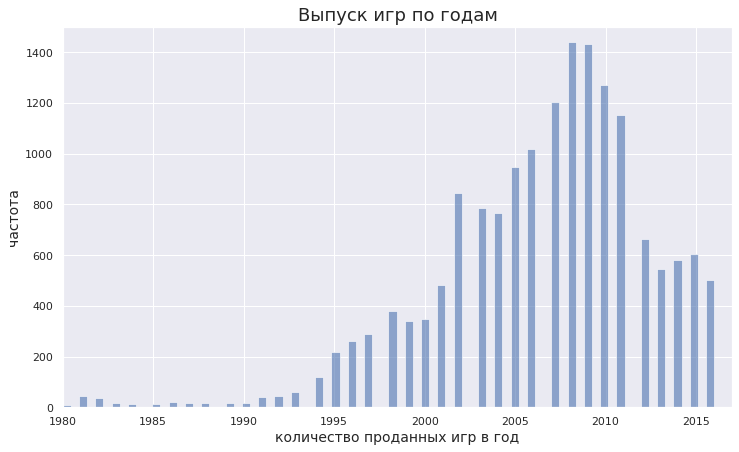

In [66]:
#Выведем полученную информацию на график
games['year'].plot(kind='hist', alpha=0.6, bins=80, figsize = (12,7), grid=True)
plt.title("Выпуск игр по годам", fontsize = 18)
plt.ylabel("частота", fontsize = 14)
plt.xlabel("количество проданных игр в год", fontsize = 14)
plt.ylim(0, 1500)
plt.xlim(1980, 2017) 
plt.show()

Видим, что больше всего игр было выпущено с 2005 по 2011 гг. При этом в период примерно до 1993 г. включительно. игр выпускалось совсем мало, меньше 100 в год. Однако не мешает еще проверить данные по фактически проданным играм, так нас интересует именно успешность продаж

In [19]:
#Создадим сводную таблицу с количеством выпущенных игр и суммарными продажами по годам
sales_by_year = games.pivot_table(index='year', values='name', aggfunc='count').join(games.pivot_table(index='year', values='all_sales', aggfunc='sum')).sort_values('all_sales', ascending=False)
display(sales_by_year)

,name,all_sales
year,,
2008,1440,680.44
2009,1431,660.31
2007,1202,606.16
2010,1271,595.63
2006,1020,523.65
2011,1153,510.59
2005,947,459.96
2004,765,419.63
2002,845,403.64


Анализ показал, что и по количеству выпущенных игр и по количеству проданных копий топ приблизительно одинаков, и если мы возьмем для дальнейшего анализа период с 1994 года, то охватим максимальное количество как по выпуску, так и по продажам. 

<a id='3.2'></a>
### Исследование изменения продаж по платформам по годам

In [20]:
#Выберем платформы с максимальными продажами
sales_by_platform = games.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values('all_sales', ascending=False).head(20)
sales_by_platform

,all_sales
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


Из таблицы можем выделить 6 платформ с наибольшими суммарными продажами: PS2, X360, PS3, Wii, DS, PS. Построим для каждой из них графики распределения продаж по годам, чтобы выявить характерный активный "срок жизни" платформы.

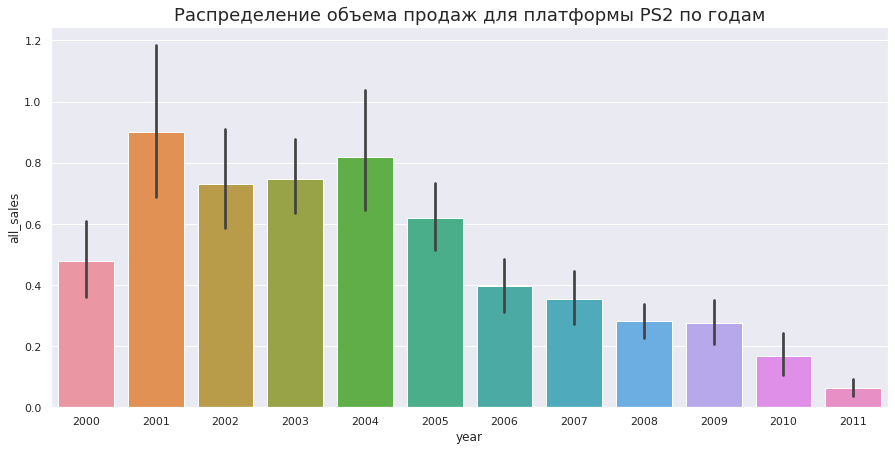

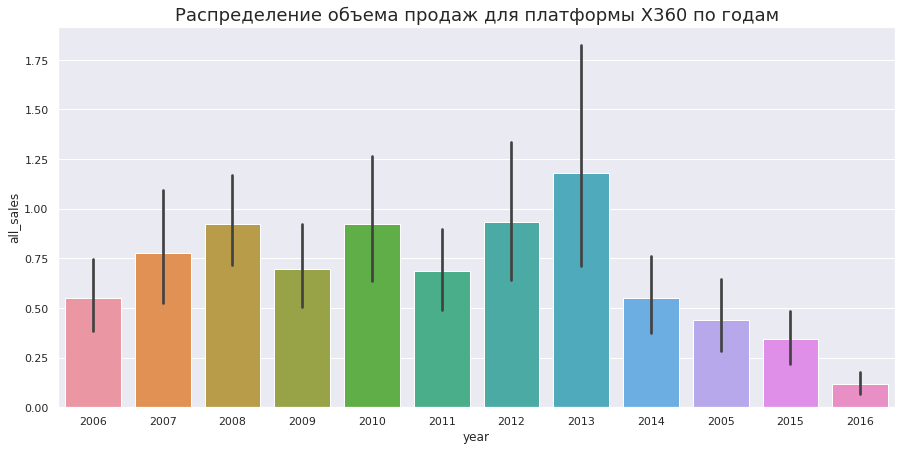

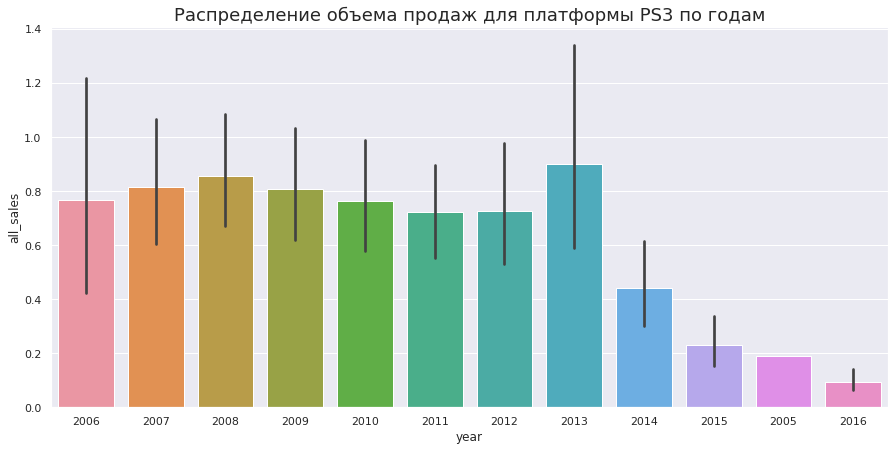

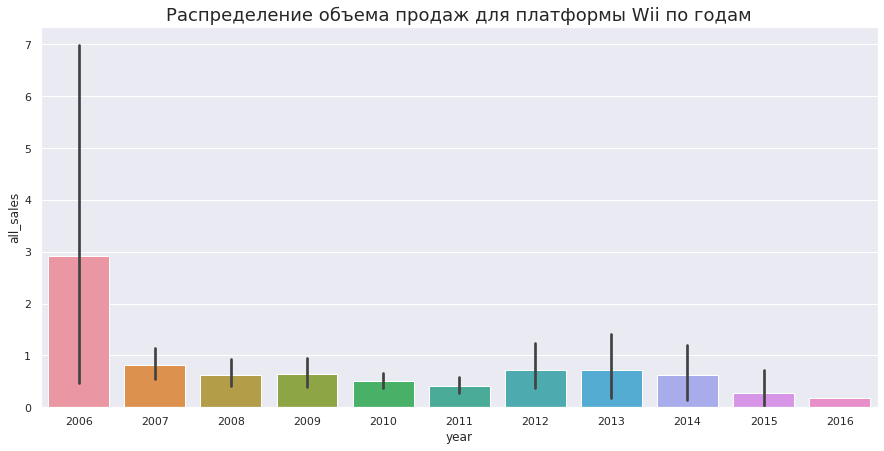

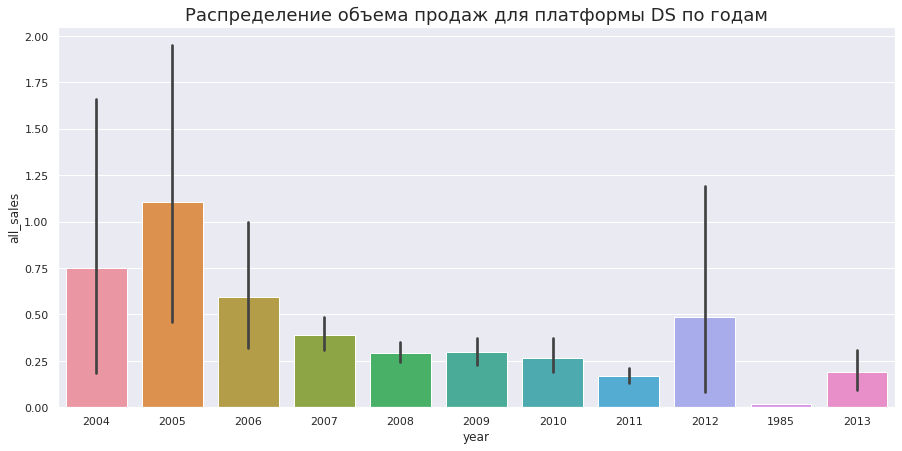

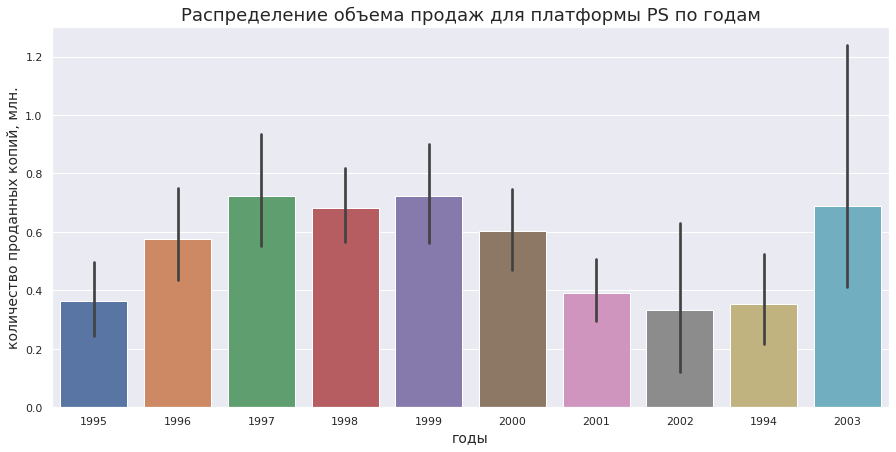

In [21]:
sns.set()
plt.figure(figsize = (15,7))
sns.barplot(x = 'year', y = 'all_sales', 
           data = games.query('platform == "PS2"'), alpha =1, linestyle = "-")
plt.title("Распределение объема продаж для платформы PS2 по годам", fontsize = 18)

plt.figure(figsize = (15,7))
sns.barplot(x = 'year', y = 'all_sales', 
           data = games.query('platform == "X360"'), alpha =1, linestyle = "-")
plt.title("Распределение объема продаж для платформы X360 по годам", fontsize = 18)

plt.figure(figsize = (15,7))
sns.barplot(x = 'year', y = 'all_sales', 
           data = games.query('platform == "PS3"'), alpha =1, linestyle = "-")
plt.title("Распределение объема продаж для платформы PS3 по годам", fontsize = 18)

plt.figure(figsize = (15,7))
sns.barplot(x = 'year', y = 'all_sales', 
           data = games.query('platform == "Wii"'), alpha =1, linestyle = "-")
plt.title("Распределение объема продаж для платформы Wii по годам", fontsize = 18)

plt.figure(figsize = (15,7))
sns.barplot(x = 'year', y = 'all_sales', 
           data = games.query('platform == "DS"'), alpha =1, linestyle = "-")
plt.title("Распределение объема продаж для платформы DS по годам", fontsize = 18)

plt.figure(figsize = (15,7))
sns.barplot(x = 'year', y = 'all_sales', 
           data = games.query('platform == "PS"'), alpha =1, linestyle = "-")
plt.title("Распределение объема продаж для платформы PS по годам", fontsize = 18)

plt.ylabel("количество проданных копий, млн.", fontsize = 14)
plt.xlabel("годы", fontsize = 14)
plt.show()

По графикам мы видим, что пики продаж по самым популярным платформам составляют от 6 до 9 лет. 

In [22]:
#Дополнительно рассчитаем срок жизни платформ по всему датасету
platforms_min_max = games.pivot_table(index = 'platform', values = 'year',
                                               aggfunc = ['min', 'max'])
platforms_min_max['max_min'] = platforms_min_max['max'] - platforms_min_max['min']
print('Средний срок жизни платформы: ', platforms_min_max.max_min.mean())

Средний срок жизни платформы:  8.161290322580646


По графикам мы видим, что пики продаж по самым популярным платформам составляют от 6 до 9 лет, за пределами этого интервала или нет ничего, или резкий спад. Расчет показывает те же данные. Таким образом, в качестве среднего срока жизни платформы можем принять 8 лет.

<a id='3.3'></a>
### Отбор данных за актуальный период

В предыдущем пункте мы приняли 8 лет за средний срок активной жизни и максимальных продаж по платформе. Поскольку нам необходимо делать прогноз на будущий год, то есть, определить платформы, которые продолжат расти или останутся на прежнем высоком уровне продаж, нам необходимо выбрать "актуальный период" для анализа и прогноза таким образом, чтобы у перспективных платформ еще оставался потенциал роста. То есть, следует делать ставки не надо абсолютных лидеров за все предыдущие годы или предыдущие 8 лет (средний цикл жизни), а на те, которые только набирают рост, но еще не прошли пик, или же находятся примерно на пике.  

Полагаю, что с этой целью мы можем выбрать платформы, которые еще не дошли до середины среднего жизненного цикла, но уже успели показать хорошую статистику. В таком случае 3 года является подходящим значением.   

***Возьмем 3 года в качестве актуального периода*** и сделаем срез данных за 2014, 2015 и 2016 годы, так как нам предстоит делать прогноз на 2017 год и далее.

In [23]:
#Сделаем срез данных за последние 3 года и сохраним в отдельном датасете для дальнейшего анализа
games_3years = games.query('year > 2013')
#Отдельно сохраним срез с включением более "старых" годов, для сравнения и оценки трендов. Возьмем только 10 лет, чтобы лучше видеть колебания жизненного цикла более или менее актуальных сегодня платформ
games_10years = games.query('2007 < year < 2017')


<a id='3.4'></a>
### Отбор потенциально прибыльных платформ

In [24]:
#Отберем лидирующие по продажам платформы за последние 3 года
sales_by_platform_3 = games_3years.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values('all_sales', ascending=False)
display('Продажи по платформам за 3 года', sales_by_platform_3)
#И для сравнения за последние 10 лет
sales_by_platform_10 = games_10years.pivot_table(index='platform', values='all_sales', aggfunc='sum').sort_values('all_sales', ascending=False)
display('Продажи по платформам за 10 лет', sales_by_platform_10)

'Продажи по платформам за 3 года'

,all_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.40
PSV,22.40
Wii,5.07


'Продажи по платформам за 10 лет'

,all_sales
platform,
PS3,840.37
X360,810.19
Wii,609.71
DS,389.81
PS4,314.14
3DS,258.53
XOne,159.32
PC,154.33
PSP,139.09


<Figure size 720x720 with 0 Axes>

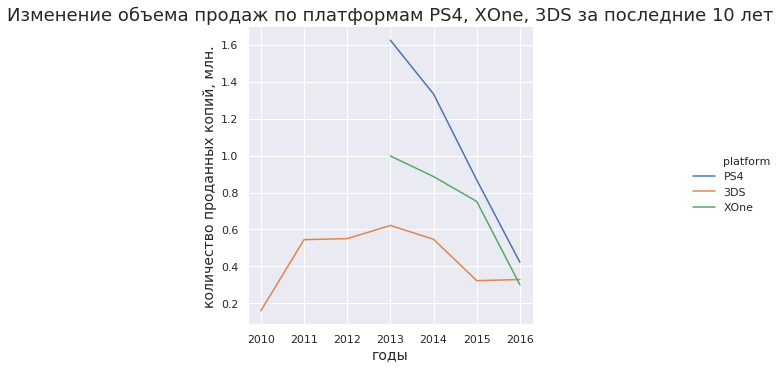

In [25]:
#Выведем на график лидеров актуального периода
sns.set()
plt.figure(figsize = (10, 10))
sns.relplot(data=games_10years.query('platform == ["PS4", "XOne", "3DS"]'),
            kind='line',
            x='year',
            y='all_sales',
            hue='platform',
            ci=None,)
plt.title("Изменение объема продаж по платформам PS4, XOne, 3DS за последние 10 лет", fontsize = 18)
plt.ylabel("количество проданных копий, млн.", fontsize = 14)
plt.xlabel("годы", fontsize = 14)
plt.show()

<Figure size 720x720 with 0 Axes>

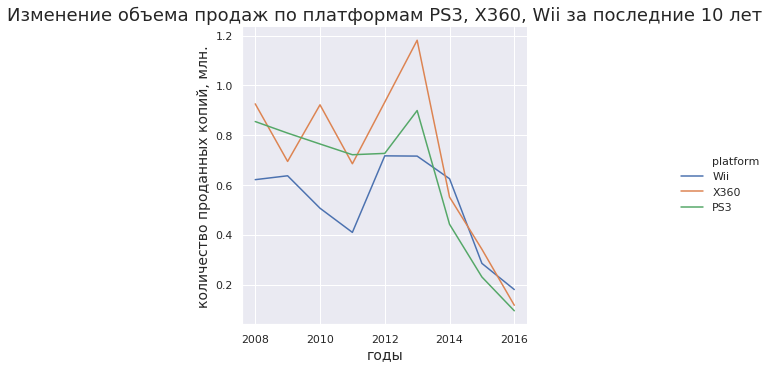

In [26]:
#Выведем на график лидеров прошлых 10 лет
sns.set()
plt.figure(figsize = (10, 10))
sns.relplot(data=games_10years.query('platform == ["PS3", "X360", "Wii"]'),
            kind='line',
            x='year',
            y='all_sales',
            hue='platform',
            ci=None,)
plt.title("Изменение объема продаж по платформам PS3, X360, Wii за последние 10 лет", fontsize = 18)
plt.ylabel("количество проданных копий, млн.", fontsize = 14)
plt.xlabel("годы", fontsize = 14)
plt.show()

Сравнивая две таблицы за 3 года и за 10 лет, мы видим, что в последние годы лидеры десятилетия (PS3, X360, Wii) уступили место новичкам (PS4, XOne, 3DS). Сравним показатели продаж за эти два периода.  

Лидеры последнего десятилетия:
* PS3 - объем продаж сильно упал, за последние 3 года он составил примерно 1/12 часть от продаж за 10 лет
* X360 - объем продаж упал еще больше, показатель за 3 года более чем в 16 раз меньше, чем за 10 лет
* Wii - объем продаж за 3 последних года составил в 121 раз меньше, чем за 10 лет   

Лидеры актуального периода:
* PS4 - объем продаж в последние 3 года составил 91% от объема продаж за 10 лет
* XOne - объем продаж за последние 3 года составил 88% от объема продаж за 10 лет
* 3DS - объем продаж за последние 3 года составил 33% от объема продаж за 10 лет (это нельзя назвать ростом, скорее, стабильное состояние)

Несмотря на то, что судя по графику, продажи по всем платформам в целом снижаются (вероятно, это объясняется стремительно развивающимся рынком мобильных приложений, а также тем, что по условию мы вероятно имеем неполные данные за 2016 год), расчеты показывают, что все равно можно выделить наиболее перспективные платформы. Исходя из этих показателей, можем заключить, что лидеры по продажам по всему датасету и за последние 10 лет к настоящему моменту уже потеряли актуальность, и поэтому очень сильно просели по продажам.   

***Лучший рост продаж за актуальный период по сравнению с предыдущим показали две платформы: PS4 и XOne, их и можно назвать наиболее перспективными из всего датасета.***

<a id='3.5'></a>
### Распределение данных о глобальных продажах игр в разбивке по платформам

Построим диаграммы размаха по выбранным ранее платформам топ-6 за последние 3 года.

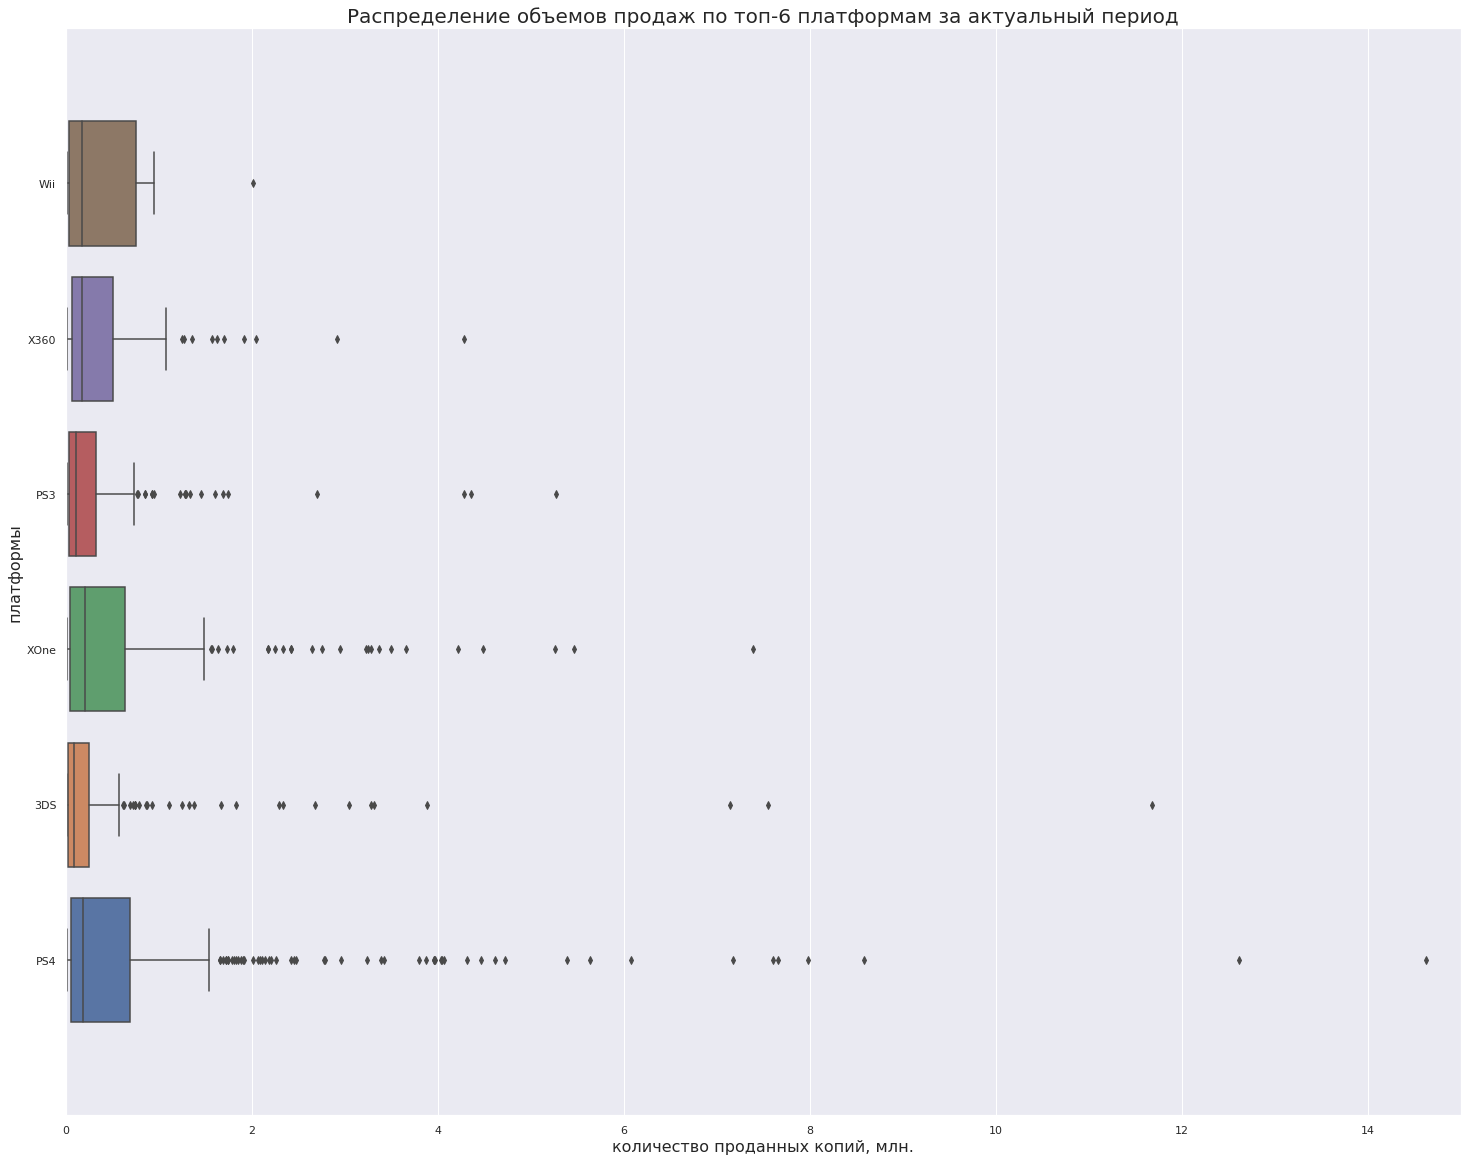

In [27]:
top6_platforms = games_3years.query('platform == ["PS4", "XOne", "3DS", "PS3", "X360", "Wii"]')
sns.set()
plt.figure(figsize = (25, 20))
sns.boxplot(y="platform", x="all_sales", data=top6_platforms, orient="h")
plt.title("Распределение объемов продаж по топ-6 платформам за актуальный период", fontsize = 20)
plt.ylabel("платформы", fontsize = 16)
plt.xlabel("количество проданных копий, млн.", fontsize = 16)
plt.ylim(-1, 6)
plt.xlim(0, 15) 
plt.show()

In [28]:
top6_platforms['all_sales'].describe()

count    1157.000000
mean        0.550268
std         1.211350
min         0.010000
25%         0.050000
50%         0.140000
75%         0.480000
max        14.630000
Name: all_sales, dtype: float64

Анализ диаграмм размаха самых прибыльных платформ за актуальный период показывает, что почти все (кроме Wii) имеют очень длинные хвосты выбросов с большими значениями. Это означает, что основную массу составляют игры, продающиеся не очень упешно, но на каждой из рассматриваемых платформ есть свои хиты, продающиеся в десятки (и даже в 100 раз, о чем говорит отношение максимума к медиане) успешнее, чем большая часть игр.   

На платформе PS4, которая стала наиболее коммерчески успешной в актуальном периоде, наблюдаются и самые большие выбросы, в то время как тело ящика находится примерно на одном уровне с другими платформами (XOne и Wii), и правый ус зканчивается там же, где и у XOne. Но за счет буквально нескольких очень успешно продававшихся игр, все направление PS4 вырвалось в лидеры (судя по графику, 2 самые продаваемые игры были выпущены именно для этой платформы).

<a id='3.6'></a>
### Оценка влияния отзывов на продажи

In [29]:
#Дополнительно проверим, для какой платформы в актуальный период было выпущено больше всего игр
games_3years['platform'].value_counts().head()

PS4     376
PSV     295
XOne    228
PS3     219
3DS     212
Name: platform, dtype: int64

Построим диаграмму рассеяния, чтобы оценить влияние отзывов на продажи в рамках одной платформы. Возьмем наиболее популярную платформу (и по продажам и по количеству выпущенных игр) актуального периода PS4 и на ее примере изучим влияние отзывов пользователей и критиков на объемы продаж.

In [30]:
games_3years.head(2)

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


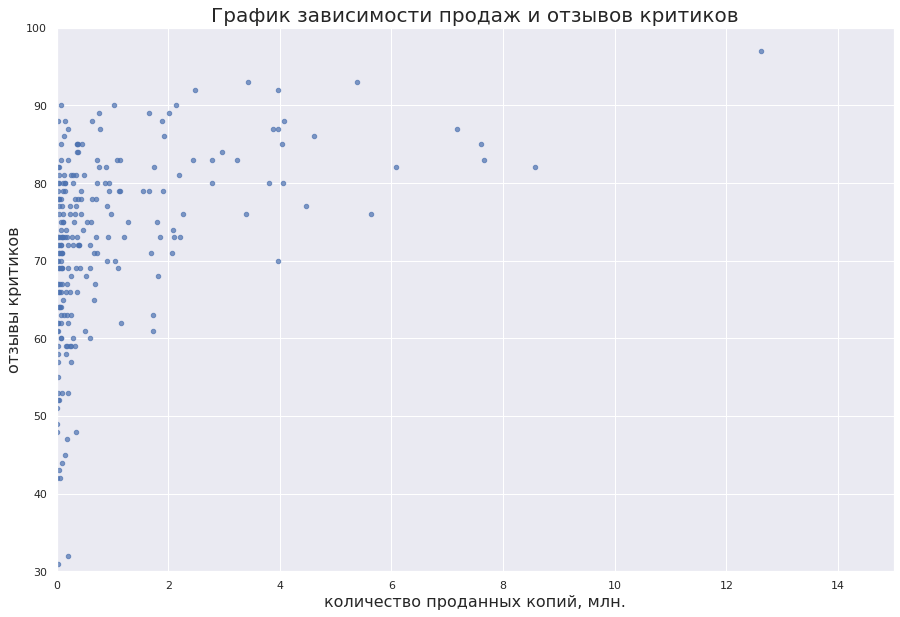

Коэффициент корреляции продаж и отзывов критиков: 0.40


In [31]:
#Построим диаграмму рассеяния для отзывов критиков
games_3years.query('platform =="PS4"').plot(x='all_sales', y='critic_score', kind='scatter', alpha=0.7, figsize=(15, 10))
plt.title("График зависимости продаж и отзывов критиков", fontsize = 20)
plt.ylabel("отзывы критиков", fontsize = 16)
plt.xlabel("количество проданных копий, млн.", fontsize = 16)
plt.xlim(0, 15)
plt.ylim(30, 100)
plt.show()
print('Коэффициент корреляции продаж и отзывов критиков: {:.2f}'.format(games_3years.query('platform =="PS4"')['all_sales'].corr(games_3years['critic_score'].astype(float))))

Коэффициент корреляции 0.4 показывает, что между оценкой критиков и количеством продаж имеется прямая зависимость, но довольно низкая.  

По диаграмме рассеяния мы видим, что основная масса оценок составляет от 70 до 85 баллов. И среди оцененных подобным образом игр есть как множество продающихся не очень активно, так и некоторое количество (их таких в принципе мало, как мы уже разобрались выше) коммерчески очень успешных продуктов. При этом, если рассматривать только самые успешные по продажам игры, например, от 2 млн. копий, то видим, что у них всех только высокие оценки (от 70). Самая успешная игра из выборки одновременно имеет и самую высокую оценку, но при этом в двух других успешных подгруппах (6+ млн. и 4-6 млн.) ситуация обратная: менее успешная группа имеет более высокий уровень оценок.

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


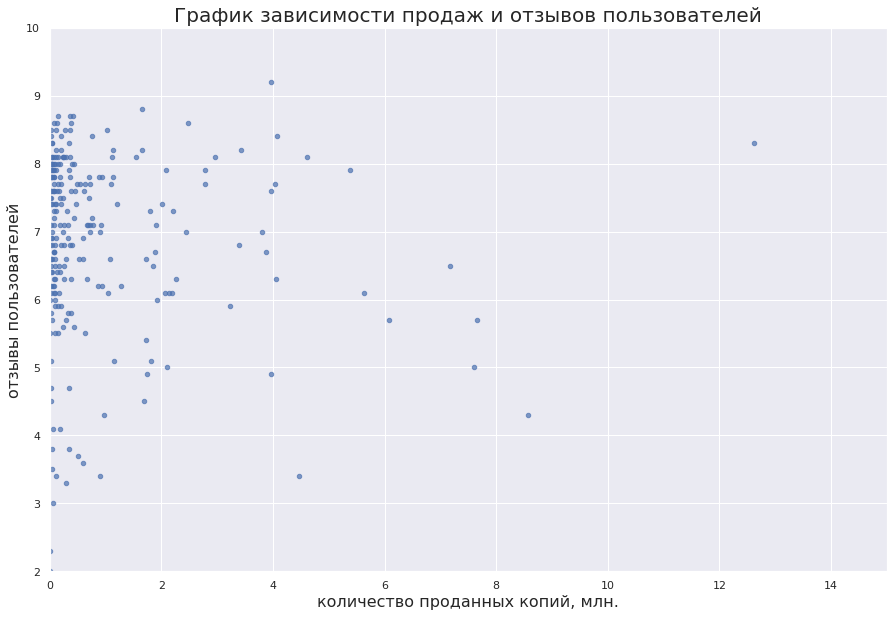

Коэффициент корреляции продаж и отзывов пользователей: -0.04


In [32]:
#Построим диаграмму рассеяния для отзывов пользователей
games_3years.query('platform =="PS4"').plot(x='all_sales', y='user_score', kind='scatter', alpha=0.7, figsize=(15, 10))
plt.title("График зависимости продаж и отзывов пользователей", fontsize = 20)
plt.ylabel("отзывы пользователей", fontsize = 16)
plt.xlabel("количество проданных копий, млн.", fontsize = 16)
plt.xlim(0, 15)
plt.ylim(2, 10)
plt.show()
print('Коэффициент корреляции продаж и отзывов пользователей: {:.2f}'.format(games_3years.query('platform =="PS4"')['all_sales'].corr(games_3years['user_score'].astype(float))))

Коэффициент корреляции продаж и отзывов пользователей практически нулевой, это означает, что между данными показателями не выявлено взаимосвязи.   

По диаграмме рассеяния мы также наблюдаем гораздо больший разброс данных, чем на диаграмме с отзывами критиков. Так, мы видим, что достаточно много коммерчески очень успешных игр имеют невысокий пользовательский рейтинг (меньше 7 и даже меньше 5)

In [33]:
#Dsdtltv сводную таблицу корреляции между продажами и оценками в разрезе платформ (для всех за актуальный период)
games_3years_scores = games_3years.pivot_table(index='platform', values=['all_sales', 'critic_score', 'user_score'], aggfunc=('corr'))
games_3years_scores = games_3years_scores.drop(['critic_score', 'user_score'], axis=1)
games_3years_scores.columns = ['correlation']
games_3years_scores


correlation
platform                          
3DS      all_sales        1.000000
         critic_score     0.314117
         user_score       0.215193
PC       all_sales        1.000000
         critic_score     0.177272
         user_score      -0.066417
PS3      all_sales        1.000000
         critic_score     0.446575
         user_score      -0.166761
PS4      all_sales        1.000000
         critic_score     0.402661
         user_score      -0.040132
PSP      all_sales        1.000000
PSV      all_sales        1.000000
         critic_score     0.042665
         user_score      -0.168455
Wii      all_sales        1.000000
         user_score       1.000000
WiiU     all_sales        1.000000
         critic_score     0.370201
         user_score       0.407926
X360     all_sales        1.000000
         critic_score     0.525723
         user_score      -0.138445
XOne     all_sales        1.000000
         critic_score     0.428677
         user_score      -0.070384

Проведенный анализ показал, что в разрезе игровых платформ между продажами и оценками критиков наблюдается прямая зависимость, но не очень сильная: максимальное значение коэффициента корреляции по играм платформы X360 - 0.53, минимальное же значение по играм для PC - 0.18. По некоторым платформам коэффициент посчитался как единица, однако, это всего лишь подразумевает отсутствие данных в соответствующих строках. 

Между продажами и оценками пользователей зависимость оказалась еще ниже, по некоторым платформам она очень близка к нулю. Максимальное значение коэффициента корреляции по играм платформы WiiU - 0.4, минимальные - в районе нуля, наблюдается также несколько случаев небольшой отрицательной зависимости, например, по платформе PS3 - это -0.17.  Самую низкую зависимость по обоим видам рейтингов можно отметить по играм для PC.

ПО результатам анализа можно заключить, что рейтинг критиков и пользователей не оказывает значительного влияния на коммерческую успешность игр. Хотя показатели и различаются для разных платформ, и где-то степень зависимости близка к нулю, а где-то приближается к среднему уровню. При этом мы помним, что в столбцах с рейтингами было очень большое количество пропусков, и возможно это значит неправильный сбор или передачу данных, из-за чего мы просто не получили всю информацию, а следовательно, и не можем ее полноценно проанализировать.

<a id='3.7'></a>
### Анализ прибыльности игр по жанрам

Выведем на графиках данные по количеству релизов, средним и суммарным продажам в разрезе жанров за актуальный период. А затем соберем их в сводную таблицу для анализа.

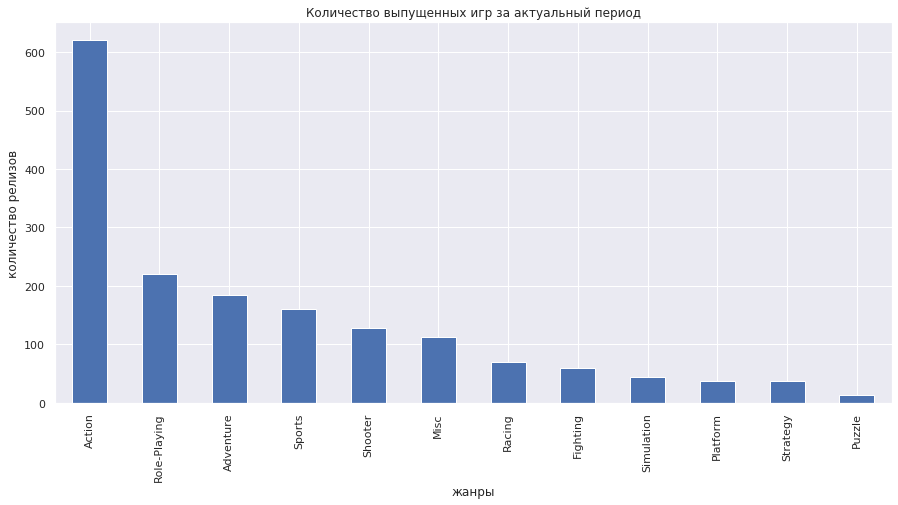

In [34]:
(games_3years
     .pivot_table(index='genre', values='all_sales', aggfunc='count')
     .sort_values('all_sales', ascending=False)
     .plot(kind='bar', y='all_sales', figsize = (15,7), legend=False)
     .set(xlabel='жанры', ylabel='количество релизов', title='Количество выпущенных игр за актуальный период')
)
plt.show()

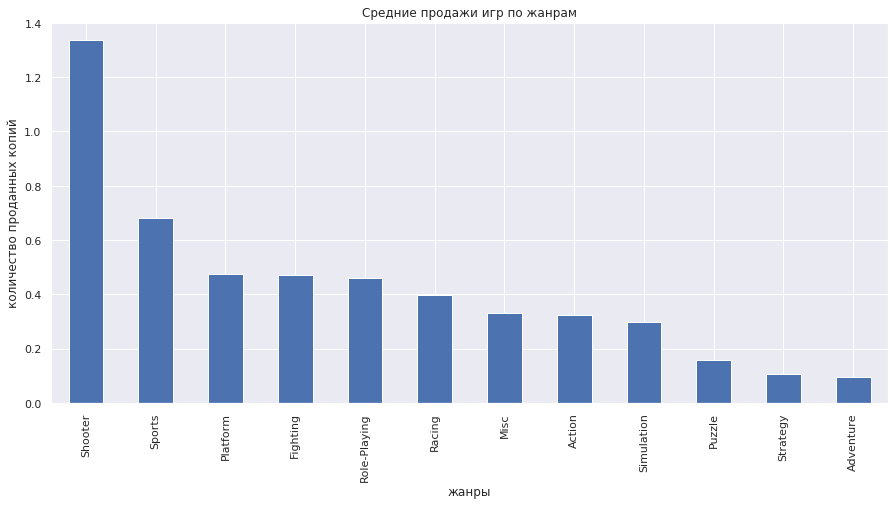

In [35]:
(games_3years
     .pivot_table(index='genre', values='all_sales')
     .sort_values('all_sales', ascending=False)
     .plot(kind='bar', y='all_sales', figsize = (15,7), legend=False)
     .set(xlabel='жанры', ylabel='количество проданных копий', title='Средние продажи игр по жанрам')
)
plt.show()

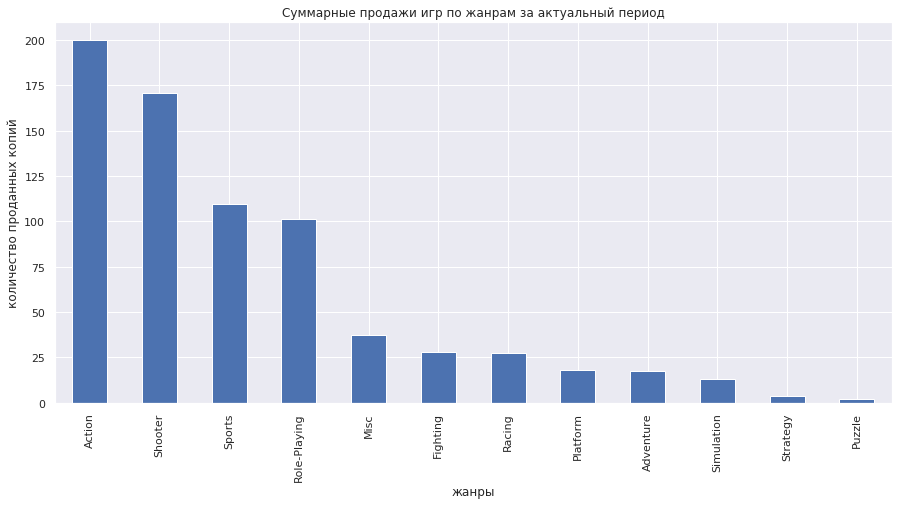

In [36]:
(games_3years
     .pivot_table(index='genre', values='all_sales', aggfunc='sum')
     .sort_values('all_sales', ascending=False)
     .plot(kind='bar', y='all_sales', figsize = (15,7), legend=False)
     .set(xlabel='жанры', ylabel='количество проданных копий', title='Суммарные продажи игр по жанрам за актуальный период')
)
plt.show()

In [37]:
#Соберем данные по трем графикам в единую таблицу
games_genres = games_3years.pivot_table(index='genre', values='all_sales', aggfunc=['count', 'mean', 'sum'])
games_genres.columns = ['count', 'mean_sales', 'sum_sales']
games_genres.sort_values('mean_sales', ascending=False)

,count,mean_sales,sum_sales
genre,,,
Shooter,128,1.335469,170.94
Sports,161,0.680000,109.48
Platform,38,0.476053,18.09
Fighting,60,0.470333,28.22
Role-Playing,221,0.459005,101.44
Racing,69,0.398841,27.52
Misc,113,0.332301,37.55
Action,620,0.322113,199.71
Simulation,44,0.298409,13.13


Согласно статистике топ-5 по количеству выпущенных игр принадлежит следующим жанрам: Action, Role-Playing, Adventure, Sports, Shooter.  

Однако, как видно по графику, средние продажи по игре и суммарные за период показывают другую картину: 
* Shooter имеет огромный отрыв по средним продажам, при том, что по количеству релизов он всего лишь на 5-м месте. По общему объему продаж - на втором месте.
* Sports на 2-м месте по средним продажам и на 3-м по  суммарным, хотя игр в этом жанре выпущено не так много (4-е место по кол-ву).
* Далее почти на равных по средним продажам жанры Platform, Fighting и Role-Playing. При этом Role-Playing находятся на 3-м месте по количеству выпущенных игр, а Platform - в хвосте (количество выпущенных игр различается почти в 5 раз). Соответственно, суммарные продажи за счет кол-ва релизов у Role-Playing достаточно высокие.
* Action - первый по количеству релизов (игр в нем было выпущено почти столько же, сколько во всех остальных жанрых вместе взятых), а также первый по суммарным продажам. Однако по показателю средних продаж плетется ближе к хвосту.
* Adventure - на третьей строчке по выпускам, но по средним продажам - самый последний, и суммарные продажи в результате тоже получаются довольно низкими.
* Остальные жанры можно отнести к середнячкам - нет ни выдающего количества релизов, ни выдающихся продаж.

Такая непропорциональность между объемами выпуска и суммарными продажами также указывает на уже отмеченный ранее признак наличия хитовых игр, которые резко выделяются популярностью над средним уровнем, и в итоге во многом "делают кассу" по своему направлению. Среди жанров как наиболее прибыльные (высокие средние показатели продаж и хорошие объемы) можно отметить шутеры и спортивные игры (Shooter, Sports), а наименне прибыльными можно назвать пазлы, стратегии и приключения (Puzzle, Strategy, Adventure), при этом пазлы и стратегии еще и выпускались реже всего.

<a id='3.8'></a>
### Вывод по анализу данных

Проведенный анализ доказал, что популярность игровых платформ приходит и уходит, и те, что были абсолютными лидерами еще несколько лет назад, в ближайшем будущем могут просесть практически до нулевых продаж. Поэтому рекламный бюджет имеет смысл вкладывать в относительно недавно появившися и растущие, но еще не достигшие середины своего жизненного цикла платформы. На основании анализа стастики популярности наиболее перспективными на данный момент можно считать платформы PS4 и XOne, они показали самый значительный прирост продаж в актуальном периоде.   

Также мы определили, что среди обширной массы мало- и среднепопулярных игр встречаются относительно редкие хиты, которые способны принести прибыль в разы большую, чем средняя по платформе/жанру. Выяснили, что популярность и прибыльность игры мало зависит от рейтинга критиков и еще меньше от оценок пользователей. А также установили наиболее и наименее популярные и прибыльные жанры. Жанры с самыми высокими средними показателями продаж: Shooter и Sports; жанры с самыми низкими показателями продаж: Puzzle, Strategy, Adventure.

<a id='4'></a>
## Портрет пользователя по регионам

<a id='4.1'></a>
### Топ-5 популярных платформ

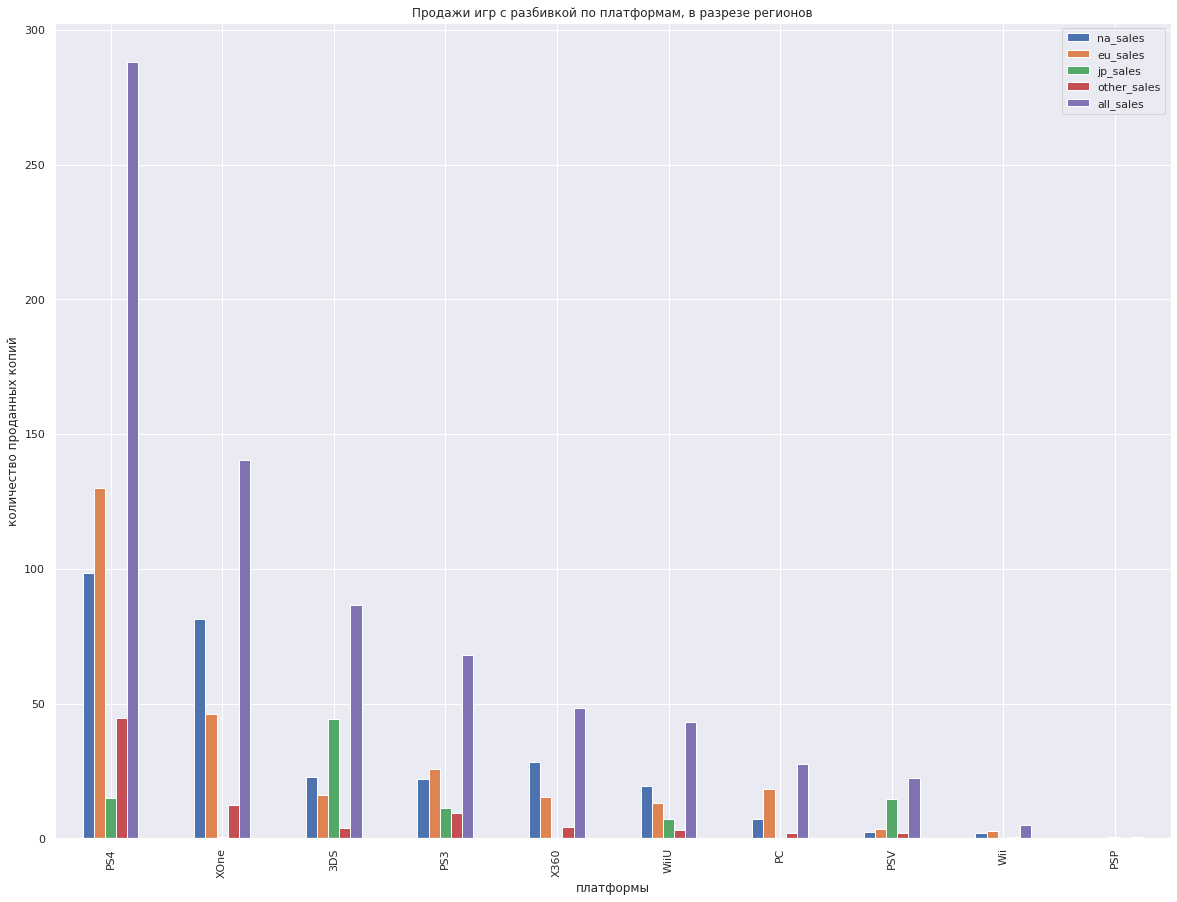

In [38]:
#Выведем график популярности платформ по каждому региону и всего
sales_regions = games_3years[[x for x in games_3years.columns if 'sales' in x] + ['platform']]
sales_regions.groupby('platform').sum().sort_values('all_sales', ascending=False).plot(kind='bar', figsize = (20,15), legend=True).set(xlabel='платформы', ylabel='количество проданных копий', title='Продажи игр с разбивкой по платформам, в разрезе регионов')
plt.show()

In [39]:
#Соберем сводную таблицу из данных по продажам по регионам и платформам
games_regions = games_3years[[x for x in games_3years.columns if 'sales' in x] + ['platform']]
games_regions5 = games_regions.groupby('platform').sum().sort_values('all_sales', ascending=False)
games_regions5        

,na_sales,eu_sales,jp_sales,other_sales,all_sales
platform,,,,,
PS4,98.61,130.04,15.02,44.48,288.15
XOne,81.27,46.25,0.32,12.52,140.36
3DS,22.64,16.12,44.24,3.68,86.68
PS3,22.05,25.54,11.22,9.37,68.18
X360,28.30,15.49,0.08,4.35,48.22
WiiU,19.36,13.15,7.31,3.16,42.98
PC,7.29,18.22,0.00,1.89,27.40
PSV,2.52,3.53,14.54,1.81,22.40
Wii,2.08,2.59,0.00,0.40,5.07


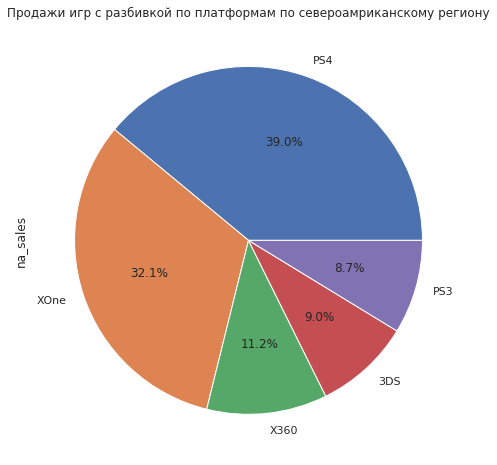

In [40]:
#Построим круговую диаграмму по региону NA, чтобы оценить доли каждой платформы в продаже игр
games_na = games_3years.groupby('platform').sum().sort_values('na_sales', ascending=False).head()
games_na['na_sales'].plot(kind='pie', figsize=(8,8), autopct='%1.1f%%', legend=False).set(title='Продажи игр с разбивкой по платформам по североамриканскому региону')
plt.show()

Анализ показал, что на североамериканском рынке топ-5 платформ соответствует наиболее популярным по всему миру в целом. Игры на платформе PS4 занимают 39% этого рынка, а наименее популярны игры на платформе PS3 (8.7%)

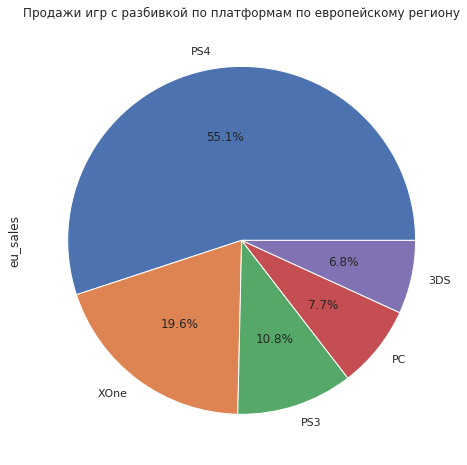

In [41]:
#Построим круговую диаграмму по региону EU, чтобы оценить доли каждой платформы в продаже игр
games_eu = games_3years.groupby('platform').sum().sort_values('eu_sales', ascending=False).head()
games_eu['eu_sales'].plot(kind='pie', figsize=(8,8), autopct='%1.1f%%', legend=False).set(title='Продажи игр с разбивкой по платформам по европейскому региону')
plt.show()

По графику видим, что в Европе в самом топе те же две платформы - PS4 и Xone. Однако остальные три места в пятерке самых популярных заняли другие по сравнению с общемировым рейтингом: PS3, PC и 3DS. В этом регионе платформа PS4 занимает более 55%.

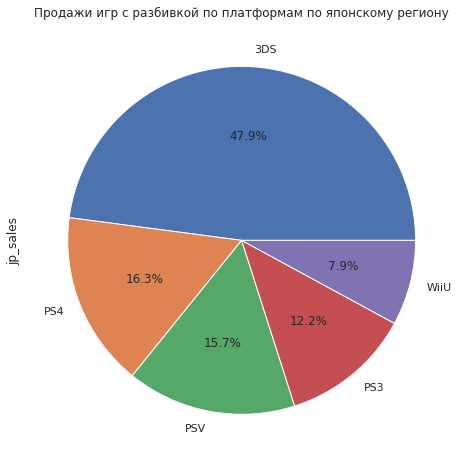

In [42]:
#Построим круговую диаграмму по региону JP, чтобы оценить доли каждой платформы в продаже игр
games_jp = games_3years.groupby('platform').sum().sort_values('jp_sales', ascending=False).head()
games_jp['jp_sales'].plot(kind='pie', figsize=(8,8), autopct='%1.1f%%', legend=False).set(title='Продажи игр с разбивкой по платформам по японскому региону')
plt.show()

В Японии мы наблюдаем совершенно другую картину по популярным платформам. Популярные во всем остальном мире игры для PS4 здесь занимают второе место и всего 16% рынка, почти наравне с двумя другими платформами - PSV и PS3. Также здесь еще пользуются платформой WiiU, которая по миру уже выходит из топа.

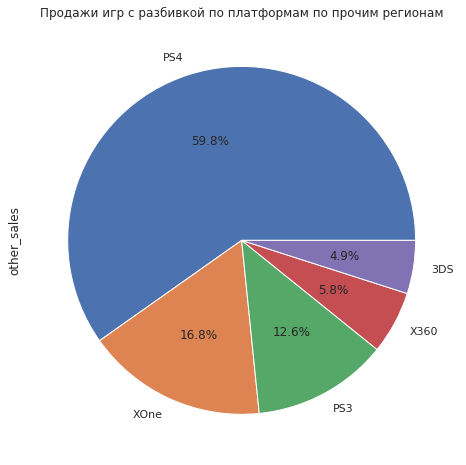

In [43]:
#Построим круговую диаграмму по прочим регионам, чтобы оценить доли каждой платформы в продаже игр
games_other = games_3years.groupby('platform').sum().sort_values('other_sales', ascending=False).head()
games_other['other_sales'].plot(kind='pie', figsize=(8,8), autopct='%1.1f%%', legend=False).set(title='Продажи игр с разбивкой по платформам по прочим регионам')
plt.show()

График показывает, что по прочим регионам в лидерах игры на тех же платформах, что и по всему миру: PS4 и Xone, остальные места занимают тоже платформы из общего топа, но в немного другой пропорции. В разрезе рассмотренных регионов именно здесь игры на PS4 занимают самую большую долю местного рынка (59.8%)

Проведенный анализ самых популярных игр в разрезе платформ показал, что у пользователей из разных регионов предпочтения довольно существенно различаются. Так, в Северной Америке практически одинаково популярны PS4 и XOne. В Европе и "других регионах" с большим отрывом лидирует PS4 (более 50% рынка), причем, Европа также занимает первое место по объему продаж игр дл PS4; игры на XOne здесь также на втором месте по популярности, но доля рынка меньше - до 20%. Стоит отметить, что у пользователей из Европы у единственных в топе находятся игры для ПК (хотя их массовая доля и невелика - 7.7%).   

В Японии оказалась совершенно другая структура продаж по платформам: почти половину рынка занимают игры для 3DS. И страна является лидером по объему продаж для этой платформы среди других регионов: ее доля более 50% от общемировых продаж для 3DS. Также можно отметить, что здесь очень мало пользуются второй по популярности в мире платформой XOne, но еще достаточно активно используют PSV и WiiU, которые в целом по миру уже утратили популярность.  

За счет того, что Япония - небольшая страна на фоне остальных рассматриваемых регионов, выбивающая статистика по ней мало повлияла на топ игровых платформ в целом по миру. По прочим регионам мы видим в топе уже отмеченные ранее как перспективные платформы PS4 и XOne.

<a id='4.2'></a>
### Топ-5 популярных жанров

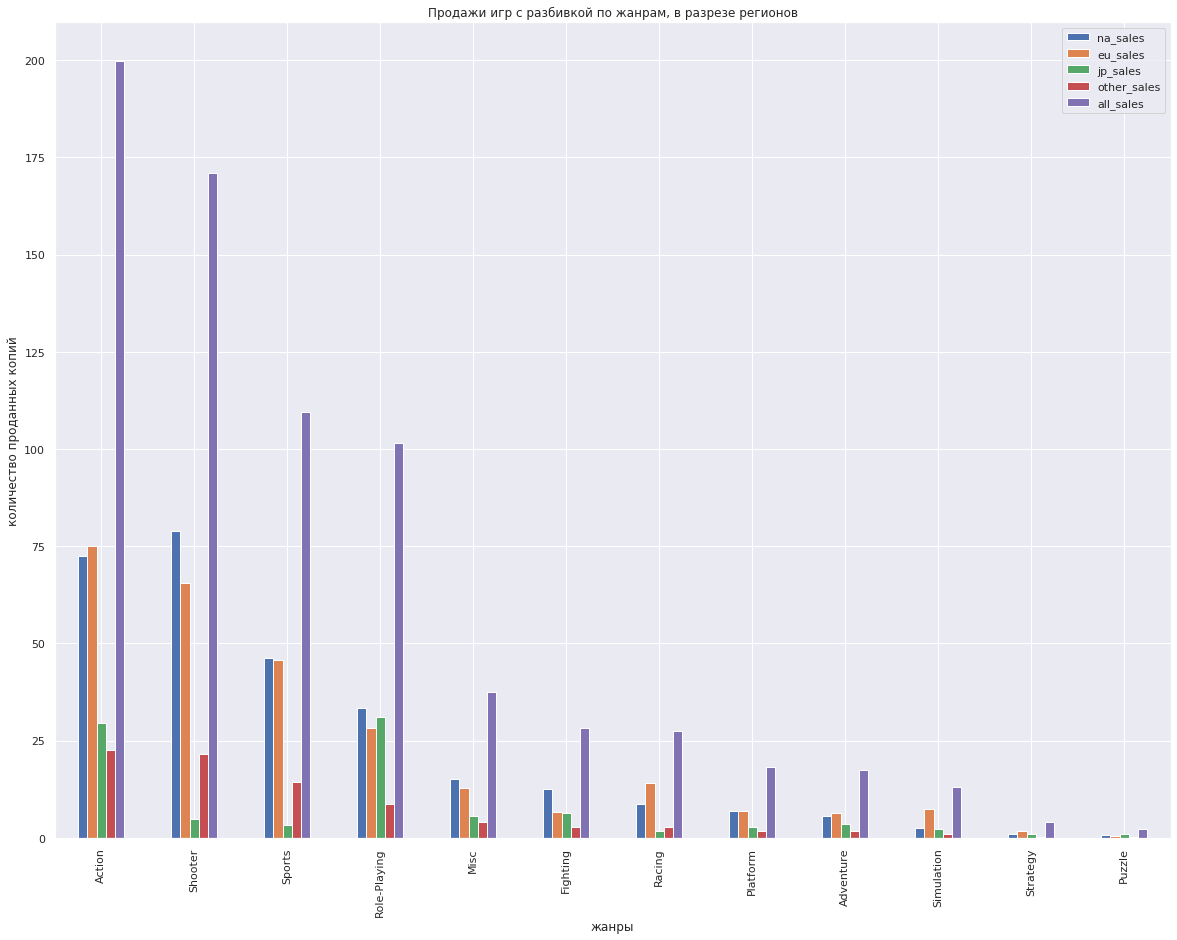

In [44]:
#Выведем график популярности жанров по каждому региону и в сумме по миру
genres_regions = games_3years[[x for x in games_3years.columns if 'sales' in x] + ['genre']]
genres_regions.groupby('genre').sum().sort_values('all_sales', ascending=False).plot(kind='bar', figsize = (20,15), legend=True).set(xlabel='жанры', ylabel='количество проданных копий', title='Продажи игр с разбивкой по жанрам, в разрезе регионов')
plt.show()

In [45]:
#Соберем сводную таблицу из данных по продажам по регионам и жанрам
genres_regions = games_3years[[x for x in games_3years.columns if 'sales' in x] + ['genre']]
genres_regions5 = genres_regions.groupby('genre').sum().sort_values('all_sales', ascending=False)
genres_regions5

,na_sales,eu_sales,jp_sales,other_sales,all_sales
genre,,,,,
Action,72.59,74.93,29.58,22.61,199.71
Shooter,79.02,65.52,4.87,21.53,170.94
Sports,46.13,45.73,3.26,14.36,109.48
Role-Playing,33.47,28.17,31.16,8.64,101.44
Misc,15.05,12.86,5.61,4.03,37.55
Fighting,12.43,6.69,6.37,2.73,28.22
Racing,8.74,14.13,1.76,2.89,27.52
Platform,6.79,6.80,2.69,1.81,18.09
Adventure,5.64,6.49,3.60,1.82,17.55


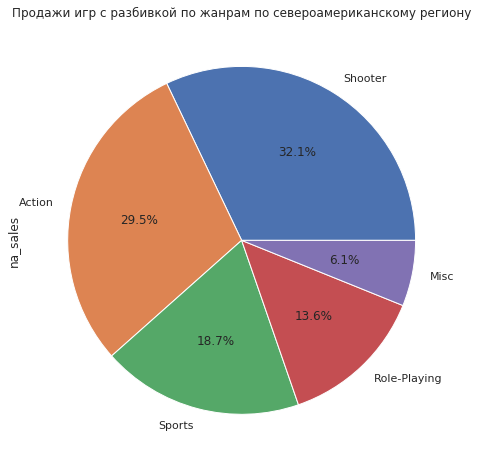

In [46]:
#Построим круговую диаграмму по региону NA, чтобы оценить доли каждого жанра в продаже игр
genres_na = games_3years.groupby('genre').sum().sort_values('na_sales', ascending=False).head()
genres_na['na_sales'].plot(kind='pie', figsize=(8,8), autopct='%1.1f%%', legend=False).set(title='Продажи игр с разбивкой по жанрам по североамериканскому региону')
plt.show()

Согласно проведенному анализу топ-5 игровых жанров по Северной Америке совпадает с общемировым топом, однако в этом регионе шутеры немного более популярны, чем жанр action - каждый занимает около 30% местного рынка. Далее по популярности следуют спортивные, ролевые и "прочие" игры - тот же порядок, что и в мировом топе.

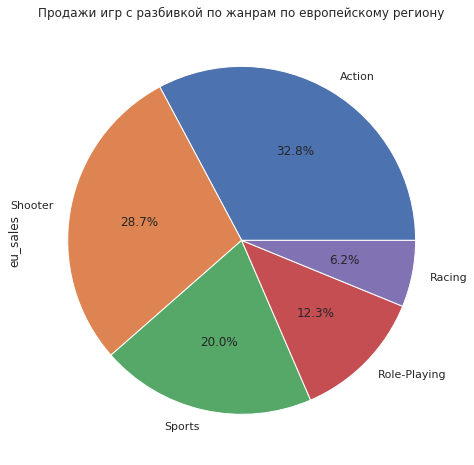

In [47]:
#Построим круговую диаграмму по региону EU, чтобы оценить доли каждого жанра в продаже игр
genres_eu = games_3years.groupby('genre').sum().sort_values('eu_sales', ascending=False).head()
genres_eu['eu_sales'].plot(kind='pie', figsize=(8,8), autopct='%1.1f%%', legend=False).set(title='Продажи игр с разбивкой по жанрам по европейскому региону')
plt.show()

На европейском рынке структура популярности игровых жанров очень похоже с североамериканской. Каждый в районе 30% +- занимают шутеры и экшн, однако в Европе, наоборот, шутеры чуть менее популярны. По продажам игр жанра action Европа занимает самую большую долю среди других регионов. В отличие от американского и общемирового топа здесь достаточно популярен жанр гонок: 6,2% местного рынка и более 50% мирового.

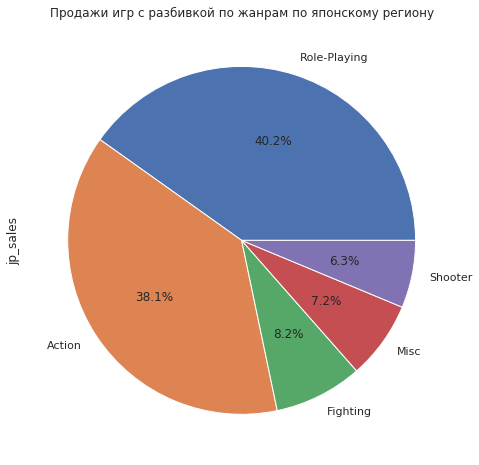

In [48]:
#Построим круговую диаграмму по региону JP, чтобы оценить доли каждого жанра в продаже игр
genres_jp = games_3years.groupby('genre').sum().sort_values('jp_sales', ascending=False).head()
genres_jp['jp_sales'].plot(kind='pie', figsize=(8,8), autopct='%1.1f%%', legend=False).set(title='Продажи игр с разбивкой по жанрам по японскому региону')
plt.show()

В Японии наибольшей популярностью пользуются ролевые игры: 40% местного рынка и около 30% от мирового (с учетом небольшого населения это серьезная цифра). Также здесь популярен жанр экшн (чуть менее 40% рынка), на 3-м месте в топе представлены файтинги (в других регионах они в топы не попали). Эти три типа жанров можно выделить как наиболее популярные в Японии, по всем остальным продажи небольшие и довольно равномерные. Спортивные игры, которые на 3-м месте в остальных регионах, малопопулярны в Японии.

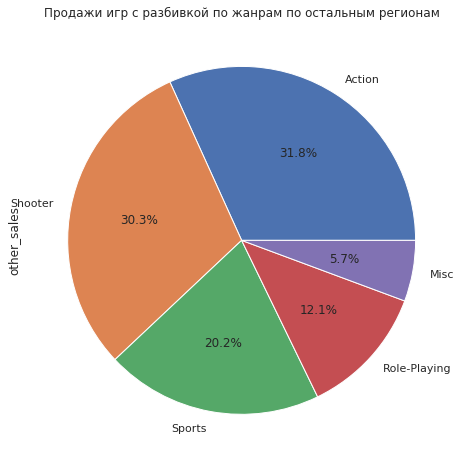

In [49]:
#Построим круговую диаграмму по остальным регионам, чтобы оценить доли каждого жанра в продаже игр
genres_other = games_3years.groupby('genre').sum().sort_values('other_sales', ascending=False).head()
genres_other['other_sales'].plot(kind='pie', figsize=(8,8), autopct='%1.1f%%', legend=False).set(title='Продажи игр с разбивкой по жанрам по остальным регионам')
plt.show()

В остальных регионах топ популярных жанров соответствует мировому, жанры экшн и шутеры пользуются практически одинаковой популярностью, далее все тоже похоже на общемировые тенденции.

Анализ продаж игр по регионам в разрезе жанров показал нам, что в большинстве регионов наибольшей популярностью пользуются одни и те же жанры. Однозначный топ-3 - это шутеры, экшн и спорт, и даже структура долей на местных рынках мало отличается в зависимости от региона: это плюс-минус 30%, 30% и 20% с небольшими колебаниями по регионам.  

Своими вкусами опять отличились пользователи из Японии, у них наиболее популярен жанр ролевых игр, а на втором месте по популярности так же как и в остальных регионах - экшн. Эти два жанра заняли почти 80% местного рынка. В других регионах ролевые игры также входят в топ-5, но их доля на местных рынках гораздо менее значительна - 12-13%.

<a id='4.3'></a>
### Влияние рейтинга ESRB на продажи

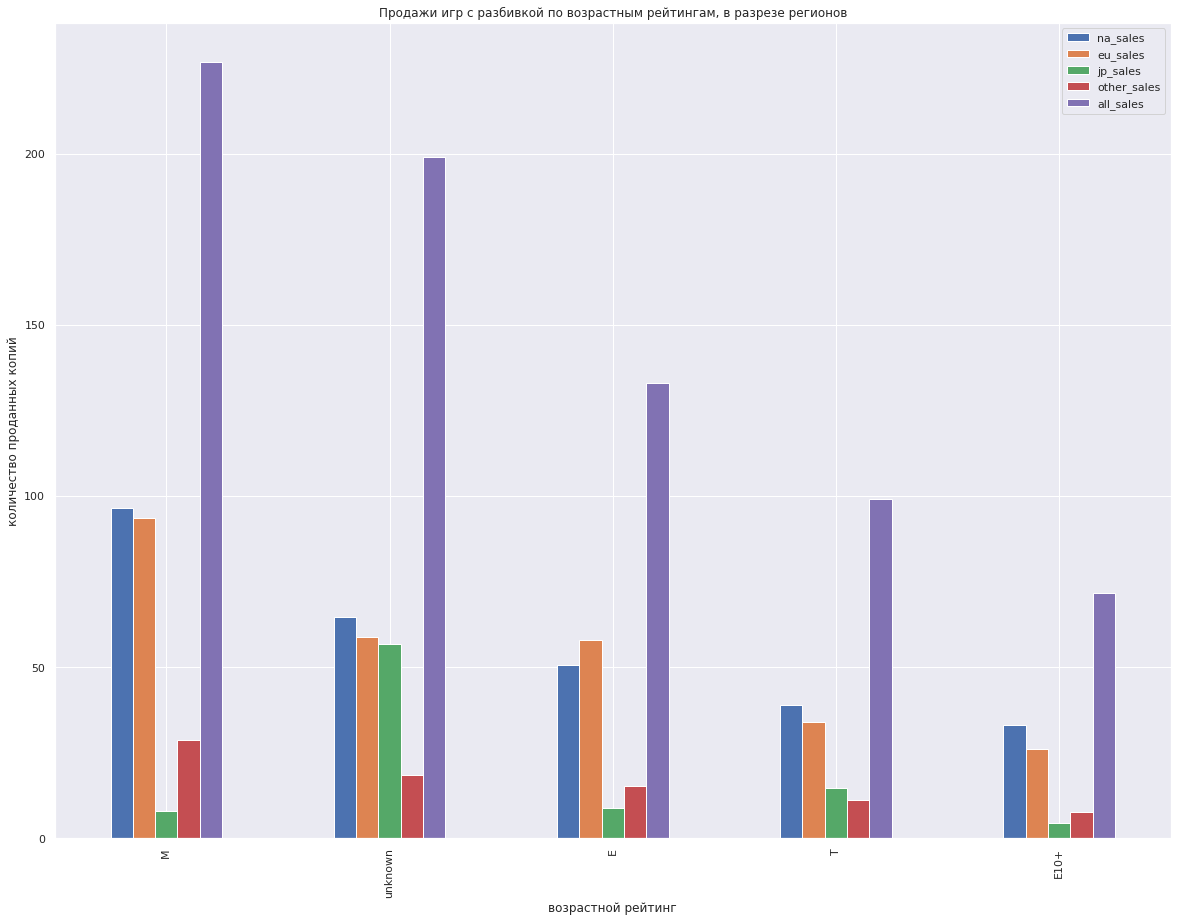

In [50]:
#Выведем график  по каждому региону и в сумме по миру
rating_regions = games_3years[[x for x in games_3years.columns if 'sales' in x] + ['rating']]
rating_regions.groupby('rating').sum().sort_values('all_sales', ascending=False).plot(kind='bar', figsize = (20,15), legend=True).set(xlabel='возрастной рейтинг', ylabel='количество проданных копий', title='Продажи игр с разбивкой по возрастным рейтингам, в разрезе регионов')
plt.show()

In [51]:
#Соберем сводную таблицу из данных по продажам по регионам и жанрам
rating_regions = games_3years[[x for x in games_3years.columns if 'sales' in x] + ['rating']]
rating_regions5 = rating_regions.groupby('rating').sum().sort_values('all_sales', ascending=False)
rating_regions5

,na_sales,eu_sales,jp_sales,other_sales,all_sales
rating,,,,,
M,96.48,93.69,8.01,28.71,226.89
unknown,64.72,58.95,56.90,18.40,198.97
E,50.74,58.06,8.94,15.39,133.13
T,38.95,34.07,14.78,11.33,99.13
E10+,33.23,26.16,4.46,7.83,71.68


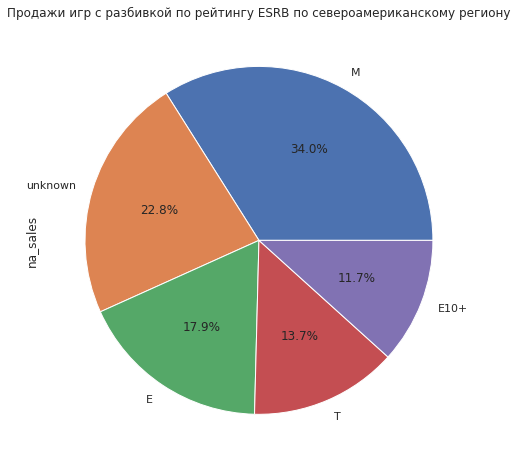

In [52]:
#Построим круговую диаграмму по региону NA, чтобы оценить доли продаж игр с определенными рейтингами
rating_na = games_3years.groupby('rating').sum().sort_values('na_sales', ascending=False).head()
rating_na['na_sales'].plot(kind='pie', figsize=(8,8), autopct='%1.1f%%', legend=False).set(title='Продажи игр с разбивкой по рейтингу ESRB по североамериканскому региону')
plt.show()

Анализ продаж для североамериканского региона показал, что наиболее покупаемы игры с рейтингом "для взрослых" (34%), затем "для всех" (17.9%), а меньше всего "для подростков" и "для 10+". Плюс, довольно значительную долю занимают игры с неизвестным рейтингом.

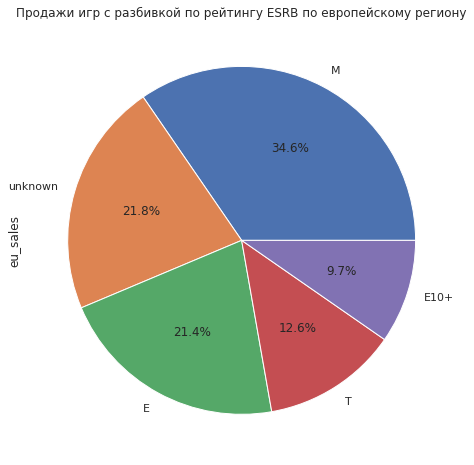

In [53]:
#Построим круговую диаграмму по региону EU, чтобы оценить доли продаж игр с определенными рейтингами
rating_eu = games_3years.groupby('rating').sum().sort_values('eu_sales', ascending=False).head()
rating_eu['eu_sales'].plot(kind='pie', figsize=(8,8), autopct='%1.1f%%', legend=False).set(title='Продажи игр с разбивкой по рейтингу ESRB по европейскому региону')
plt.show()

На европейском рынке очень похожая на американскую структура продаж в разрезе возрастных рейтингов, лишь незначительно больше доля игр "для всех" и чуть ниже - "для 10+"

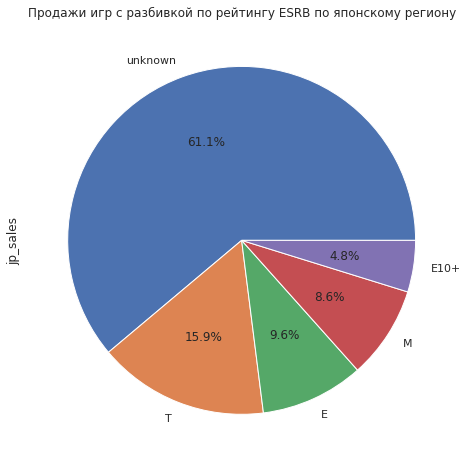

In [54]:
#Построим круговую диаграмму по региону JP, чтобы оценить доли продаж игр с определенными рейтингами
rating_jp = games_3years.groupby('rating').sum().sort_values('jp_sales', ascending=False).head()
rating_jp['jp_sales'].plot(kind='pie', figsize=(8,8), autopct='%1.1f%%', legend=False).set(title='Продажи игр с разбивкой по рейтингу ESRB по японскому региону')
plt.show()

У японского рынка мы видим совсем другую структуру продаж: более 60% - игры без рейтинга, 15.9% - игры для подростков. Игры "для всех" и "для взрослых" - менее 10%, в то время как в других регионах они на лидирующих позициях.

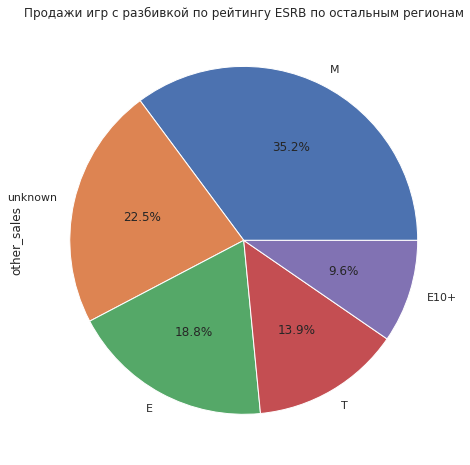

In [55]:
#Построим круговую диаграмму по остальным регионам, чтобы оценить доли продаж игр с определенными рейтингами
rating_other = games_3years.groupby('rating').sum().sort_values('other_sales', ascending=False).head()
rating_other['other_sales'].plot(kind='pie', figsize=(8,8), autopct='%1.1f%%', legend=False).set(title='Продажи игр с разбивкой по рейтингу ESRB по остальным регионам')
plt.show()

Прочие регионы демонстрируют приблизительно ту же самую структуру продаж по рейтингам, как у североамериканских и европейских пользователей.

Анализ продаж игр по возрастным рейтингам для отдельных регионов показал, что в целом в мире и в подавляющем большинстве регионов продается больше всего игр с рейтингом "для взрослых" (доля около 35%), на втором месте игры без рейтинга (около 22%), на третьем игры с рейтингом "для всех" (18-22%), оставшиеся 20-25% почти поровну делят между собой игры "для подростков" и "10+".  

Совершенно другую структуру продаж по возрастным рейтингам мы видим в Японии: более 60% игр без рейтинга, 15.9% "для подростков". Самых популярных в остальном мире игр "для взрослых" и вторых по популярности "для всех" - здесь менее 10% для каждого из сегментов. Такое несоответствие можно объяснить тем, что в Японии существует собственная система возрастных рейтингов: посмотрела ее, по смыслу похоже, но у них могут быть другие критерии отнесения к тем или иным группам, поэтому в итоге не получается точного соответствия рейтингов, и остаются пропуски в данных.  

Также довольно большой процент игр с отсутствующим рейтингом мы видим и в других регионах. Поскольку в текущем разделе мы исследовали выборку за последние три года, здесь не может идти речь об очень старых играх с отсутствующим или имеющим какие-то иные обозначения устаревшим рейтингом. Есть вероятность, что это игры, выпущенные в регионах с другой рейтинговой системой (та же Япония - крупный производитель компьютерных игр), которую не удалось корректно конвертировать в ESRB. Также нельзя исключать возможность ошибок при выгрузке или переносе данных.

<a id='4.4'></a>
### Вывод по анализу пользователей по регионам

Анализ продаж игр в разрезе регионов подтвердил выявленные ранее потенциальные направления развития. Из платформ наиболее перспективными на данный момент признаем PS4 и XOne. Из жанров наиболее популярны экшн, шутеры, сорт и ролевые, однако если стоит задача сконцентрирована на потенциально более прибыльных играх (по средним продажам на игру), то это шутеры и спортивные.   
Если рассматривать возрастные рейтинги, то наиболее популярны игры для взрослых, подростков и "для всех возрастов". Но по этому показателю нельзя быть уверенными в точности рекомендаций, т.к. есть большое количество пропусков.  

Анализ продаж по регионам выявил особые предпочтения пользователей из Японии, у них наиболее популярны игры на платформе 3DS и в жанре ролевых игр. При планировании рекламной кампании обязательно нужно учесть эти особенности региона.

<a id='5'></a>
## Проверка гипотез

<a id='5.1'></a>
### Средние пользовательские рейтинги платформ Xbox One и PC

In [56]:
#Сначала сделаем срезы по каждой из интересующих нас платформ, сразу исключив nan
games_xone = games_3years.query('platform =="XOne" and (user_score != "Nan")')
games_PC = games_3years.query('platform =="PC" and (user_score != "Nan")')


Гипотеза, которую необходимо проверить: средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Это две независимые совокупности, и для проверки гипотезы потребуется сопоставление средних этих совокупностей. Такое сопоставление позволяет осуществить t-критерий Стьюдента, применяемый для проверки равенства средних значений в двух выборках.  

Для проверки по t-критерию сформулируем нулевую и альтернативную гипотезы:

* **H0** - средний пользовательский рейтинг для платформы Xbox One равен среднему пользовательскому рейтингу для PC (в качестве нулевой необходимо брать гипотезу о равенстве)
* **H1** - средние пользовательские рейтинги для Xbox One и PC различаются.

Перед непосредственной проверкой гипотез необходимо определить, можно ли считать равными дисперсии наших выборок, для указания этого параметра в формуле и получения более точного результата. Для проверки выполним тест Левена, который выдаст коэффициент различия дисперсий.

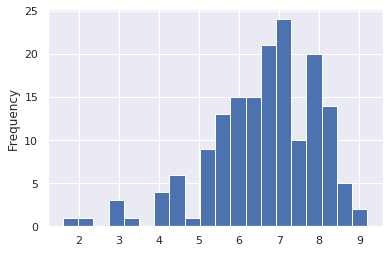

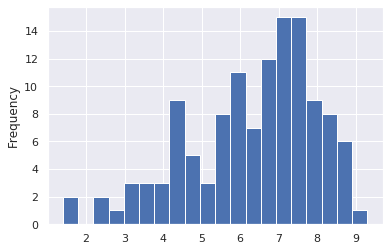

In [57]:
#Визуальная оценка нормальности распределений
games_xone['user_score'].plot(kind='hist', bins=20)
plt.show()
games_PC['user_score'].plot(kind='hist', bins=20)
plt.show()

In [58]:
#Проведем тест Левена, в качестве аргумента используем медиану, т.к. распределения асимметричны
stat, p = levene(games_xone['user_score'], games_PC['user_score'], center='median')
p

0.01358684357345301

Проверка по тесту Левена показала, что дисперсии выборок различаются более, чем на 5%, следовательно, далее при проверке гипотезы передаем equal_var = False

In [59]:
#Проверим гипотезу с помощью t-теста Стьюдента
alpha = 0.05
results = st.ttest_ind(games_xone['user_score'], games_PC['user_score'], equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.13923712043548309
Не получилось отвергнуть нулевую гипотезу


По результам проверки принимаем нулевую гипотезу о равенстве средних пользовательских рейтингов игр для платформ XOne и PC.

Посмотрим, насколько близки эти показатели.

In [60]:
print('Средний пользовательский рейтинг игр для XOne: ', (games_xone['user_score'].mean()))
print('Средний пользовательский рейтинг игр для PC: ', (games_PC['user_score'].mean()))

Средний пользовательский рейтинг игр для XOne:  6.594545454545456
Средний пользовательский рейтинг игр для PC:  6.316260162601626


Видим, что средние рейтинги платформ действительно различаются очень незначительно, для десятибалльной шкалы разница малоощутима.

<a id='5.2'></a>
### Средние рейтинги жанров Action и Sports

In [61]:
#Сначала сделаем срезы по каждой из интересующих нас платформ, сразу исключив nan
games_action = games_3years.query('genre =="Action" and (user_score != "Nan")')
games_sports = games_3years.query('genre =="Sports" and (user_score != "Nan")')


Гипотеза, которую необходимо проверить: средние пользовательские рейтинги платформ игр жанров Action и Sports разные. Это две независимые совокупности, и для проверки гипотезы потребуется сопоставление средних этих совокупностей. Такое сопоставление позволяет осуществить t-критерий Стьюдента, применяемый для проверки равенства средних значений в двух выборках.  

Для проверки по t-критерию сформулируем нулевую и альтернативную гипотезы:

* **H0** - средний пользовательский рейтинг игр в женре Action равен среднему пользовательскому рейтингу игр в жанре Sports (в качестве нулевой необходимо брать гипотезу о равенстве, хотя в задании она и сформулирована наоборот).
* **H1** - средние пользовательские рейтинги игр в жанрах Action и Sports различаются.

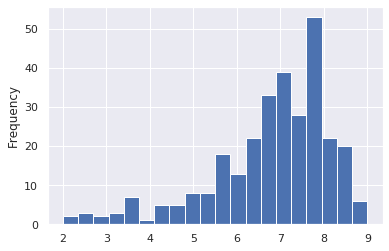

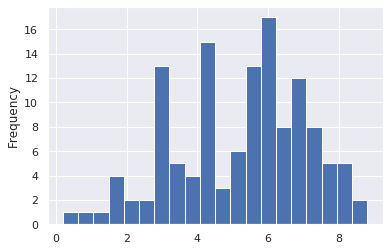

In [62]:
#Визуальная оценка нормальности распределений
games_action['user_score'].plot(kind='hist', bins=20)
plt.show()
games_sports['user_score'].plot(kind='hist', bins=20)
plt.show()

In [63]:
#Проведем тест Левена, в качестве аргумента используем медиану, т.к. распределения асимметричны
stat, p = levene(games_action['user_score'], games_sports['user_score'], center='median')
p

4.580194937538438e-06

Проверка по тесту Левена показала, что дисперсии выборок различаются в 4.5 раза, следовательно, далее при проверке гипотезы передаем equal_var = False

In [64]:
#Проверим гипотезу с помощью t-теста Стьюдента
alpha = 0.05
results = st.ttest_ind(games_action['user_score'], games_sports['user_score'], equal_var = False)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 9.658176026869598e-15
Отвергаем нулевую гипотезу


По результатам проверки отвергаем нулевую гипотезу о равенстве пользовательских рейтингов игр в жанрах Action и Sports. Следовательно, принимаем изначально сформулированную в задании гипотезу о том, что средние рейтинги по этим жанрам различаются.

Посмотрим, как велико это различие.

In [65]:
print('Средний пользовательский рейтинг игр в жанре Action: ', (games_action['user_score'].mean()))
print('Средний пользовательский рейтинг игр в жанре Sports: ', (games_sports['user_score'].mean()))

Средний пользовательский рейтинг игр в жанре Action:  6.766442953020134
Средний пользовательский рейтинг игр в жанре Sports:  5.2251968503937


Видим, что средние рейтинги игр этих жанров различаются более, чем на 1.5 единицы, это уже довольно значительная разница.

<a id='6'></a>
## Общий вывод

Целью проекта было выявление закономерностей, влияющих на коммерческую успешность игры. Необходимо было отработать общие принципы работы с данными, которые позволят анализировать и выявлять наиболее перспективные продукты сейчас, а также в будущем в изменившихся условиях.  

В первую очередь мы определили, что игровые платформы, как и другая современная техника, имеют определенный "жизненный цикл", по истечении которого морально устаревают и перестают использоваться широкими массами игроков. Это подразумевает прекращение жизненного цикла и тех игр, которые были выпущены под такие платформы. Поэтому для оценки популярности игр в разрезе платформ необходимо брать в расчет только свежие данные (в нашем проекте были взяты 3 года - как средний срок приближения платформы к пику жизненного цикла, однако в будущем сроки могут меняться в любую сторону в зависимости от направления развития индустрии). Опираться на исторические данные об устаревших на текущий момент играх нет. Также мало смысла вкладываться в развитие игр, которые еще популярны, но уже пережили свой пик развития, и продажи по ним уже падают. Важно опеределить актуальный период для анализа и прогноза, а затем проводить оценку трендов опираяясь только на него.

Также мы выявили, что для оценки перспективности игры важно определить популярные жанры. Причем, жанры лучше оценивать не по суммарному доходу от продажи (т.к. они зависят не только от прибыльности продукта, но и от количества релизов), а по средним продажам. В нашем датасете были характерные примеры: лидер по объему продаж - жанр экшн - стал таковым благодаря очень большому количеству выпущенных игр, в то время как в жанрах спорт и шутер игр было выпущено гораздо меньше, но они в среднем были намного более успешны.

Следует учитывать и возрастные ограничения. Анализ показал, что большей популярностью пользуются игры, рассчитанные на взрослых, подростков и без ограничения возраст. Игры для детей занимают небольшую долю рынка. Полагаю, что такое положение вещей можно считать устойчивым.

Анализ продаж по регионам показал, что пользователи по всему миру имеют очень похожие предпочтения. Доли рынка по жанрам и платформах варьируются незначительно. Однако мы увидели, что рынок компьютерных игр Японии по всем показателям очень отличается от остальных регионов, здесь совершенно другие предпочтения пользователей и по жанрам, и по платформам. Это связано и с некоторой культурной обособленностью, и с развитым собственным рынком игр. Поэтому для продвижения на японском рынке стоит выбирать другие продукты. Возможно в будущем имеет смысл отдельно исследовать и другие крупные страны/регионы на предмет особых предпочтений и планирования индивидуальных кампаний.  

Также мы выяснили, что пользовательский рейтинг практически не имеет связи с уровнем продаж, а оценки экспертов хоть и имеют корреляцию с продажами, но не очень большую. Можно увидеть, что успешные игры практически всегда имеют хорошие оценки (выше 70-75), но при этом игры-хиты редки и теряются в огромной массе неуспешных и средненьких игр с такими же высокими или даже еще выше оценками. Поэтому при оценке перспективных продуктов на рейтинги пользователей/экспертов обращать внимание можно, но только как дополнительную информацию, отводить им определяющую роль нельзя.  

Подытожим основные показатели, на которые нужно ориентироваться при выявлении перспективных игр:
* Платформа - желательно быстро набирающая популярность и имеющая растущую статистику продаж в актуальном периоде. Допустимо на пике или немного после, чтобы успеть захватить "активные годы" и не попасть на спад.
* Жанр - выбираем с максимальными показателями средних продаж и н